# The Boston Housing Dataset
### Machine Learning and Statistics Assessment 2019
#### Due December 13th 2019
#### Simon McLain G00364775
### Introduction to the Boston Dataset
The Boston house-price was utilised by David Harrison Jr. and Daniel L. Rubinfeld in their paper "Hedonic Housing Prices and the Demand for Clean Air" published in the Journal of Environmental Economics and Management 5, pg. 82-102 in 1978. Their purpose was to derive an equation to express the willingness to pay more for housing if buyers or renters percieve improved air quality. The dataset containing 506 data points for 13 numeric/ categorical predictive attributes was used to identify price factors according to the premises internal and external characteristics affecting it. The fourteenth attritbute "Median Value" is the dependent variable, their hypothesis being that the numeric/ categorical attributes within the dataset could be used to predict the "Median Value" of housing. 

A link to their full article in provided in the references section along with blogs visited while conducting this assignment.  

The dataset, now commonly referred to the Boston Housing Dataset is often used machine learning blogs and papers to discuss regression analysis

![title](images\pic.jpg)
##### The image is released free of copyrights under Creative Commons CC0


## Import Libraries 

In [1]:
# Import libraries for analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import keras as kr
%matplotlib inline

# Hide warnings to improve readibility
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Load the Boston dataset

In [2]:
# Import Boston Housing dataset from SciKit Learn
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
# discover the keys for the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Add a new column to the dataframe for Median Values of housing
df['MEDV'] = dataset.target

# Describe

In [6]:
# Description of the attributes of Boston Housing datase
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Average Median Value of Housing
x = df.loc[:,"MEDV"].mean()
print("The Median Housing Value in thousands is: ", "$", round(x, 2))

The Median Housing Value in thousands is:  $ 22.53


In [8]:
print("Table 1. Full Descriptive Statistics")
df.describe().round(2)

Table 1. Full Descriptive Statistics


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Plot 1


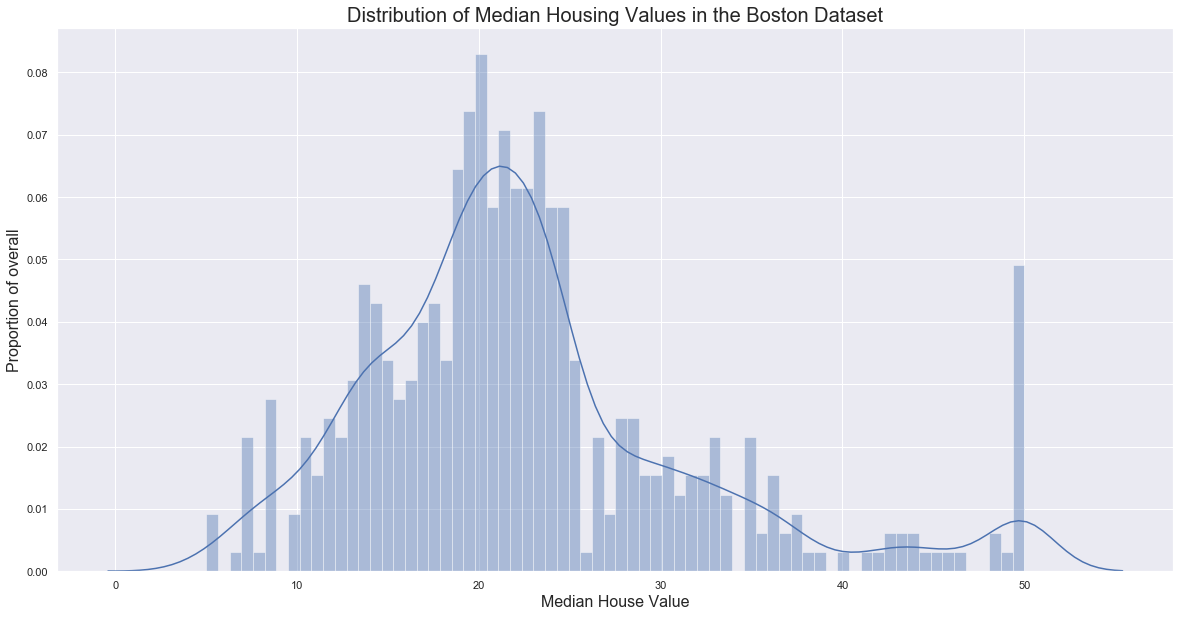

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'])
ax = sns.distplot(x, bins=70, color='b', norm_hist=False, hist=True)
plt.title('Distribution of Median Housing Values in the Boston Dataset', fontsize=20)
plt.ylabel('Proportion of overall', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
print('Plot 1')

### Summary of Descriptive Statistics
The median housing value is $22,530. Overall, as displayed in Plot  the median values appear broadly to be normally distributed with a positive skew and some outliers at the higher end of values. 

# Infer

## Is there a significant difference in median house prices between houses along the Charles river and those that aren't?
![title](images\CHAS.jpg)

###### A watercolor illustration made for the Boston Esplanade Association.FRANK COSTANTINO
###### https://www.bostonglobe.com/arts/2012/03/04/make-better-esplanade-harness-citizens-passion/Z8hyWWzjJbJ9vCcvvyNaiM/story.html

### Summary
Several Statisical Analysis Techniques were used to determine the probablity of there being no significant difference between the median value of houses along the Charles river and those house that where not, (i.e. the null hypothesis). If the probablity that the two groups are samples from the same population is less than 0.05 then the null hypothesis can be rejected and the conclusion made that, based on the available observations, that there **is** a significant difference between the median value of houses. 

The conclusion using a variety of statistical techniques for cross-validation is that there is a statistical difference in median values for houses located on the Charles river and houses not located on the Charles river based on the observations within this dataset. 

Let's begin with some descriptive statistics. The plot below tells us that significantly fewer houses in the dataset are located along the Charles river, 35 versus 471. Houses not along the Charles river seem to follow a positively skewed normal distribution with a positive skew. The histogram in Plot 2 for houses along the Charles river is not very informative and should not be used to draw any conclusions.

Some deeper statistical analysis will be beneficial. 

#### Descriptive Statistics
It is clear that housing along the Charles river (MEDV_river in Table 2) have a higher mean value and a greater proportion of housing in the 3rd quartile than housing not along the Charles river (MEDV_no_river in Table 2). But this does not indicate that they two groups are not samples from the same overall population. 

In [10]:
# Slice CHAS column according to boolean values. 1 = along river, 0 = not along river
river_stats = df[df['CHAS']==1].describe()
river_stats.rename(columns=lambda x:x+'_river',inplace=True) 
no_river_stats = df[df['CHAS']==0].describe()
no_river_stats.rename(columns=lambda x:x+'_no_river',inplace=True) 
# create a new array containing 
statistics = pd.concat([river_stats, no_river_stats], axis=1)

In [11]:
desc = statistics.loc[:, ['MEDV_river', 'MEDV_no_river']]
print("Table 2. Descriptive statistics for MEDV according to CHAS showing differences between means of the groups")
desc

Table 2. Descriptive statistics for MEDV according to CHAS showing differences between means of the groups


,MEDV_river,MEDV_no_river
count,35.000000,471.000000
mean,28.440000,22.093843
std,11.816643,8.831362
min,13.400000,5.000000
25%,21.100000,16.600000
50%,23.300000,20.900000
75%,33.150000,24.800000
max,50.000000,50.000000


The histogram below, showing the distribtion of housing values in the two groups again shows they are centred around different means, however this still could simply be two samples from the same overall population.

Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river


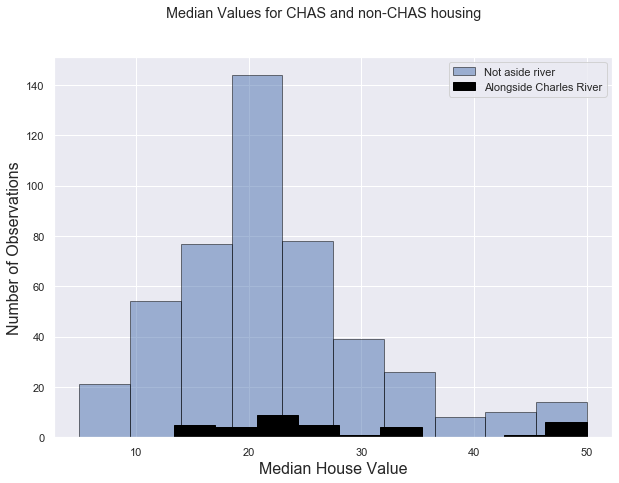

In [12]:
print('Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river')
fig = plt.figure()
fig.suptitle('Median Values for CHAS and non-CHAS housing')
df[df['CHAS']==0].MEDV.plot(kind='hist',color='b',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['CHAS']==1].MEDV.plot(kind='hist',color='black',edgecolor='black', figsize=(10,7))
L = plt.legend()
L.get_texts()[0].set_text('Not aside river')
L.get_texts()[1].set_text('Alongside Charles River')
plt.ylabel('Number of Observations', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
plt.show()

Boxplots help us to visualise the distribution of Median housing values in the two samples. We can see that housing along the Charles river has a higher median value, as well as a greater spread or standard deviation from the mean value. Housing not along the Charles river has a small spread in values but a greater number of outliers. The boxplot is useful in visualising the data, however based solely on this data the Charles river housing could reasonably be argued to be within the range of outliers for houses not on the Charles river. 

Plot 3


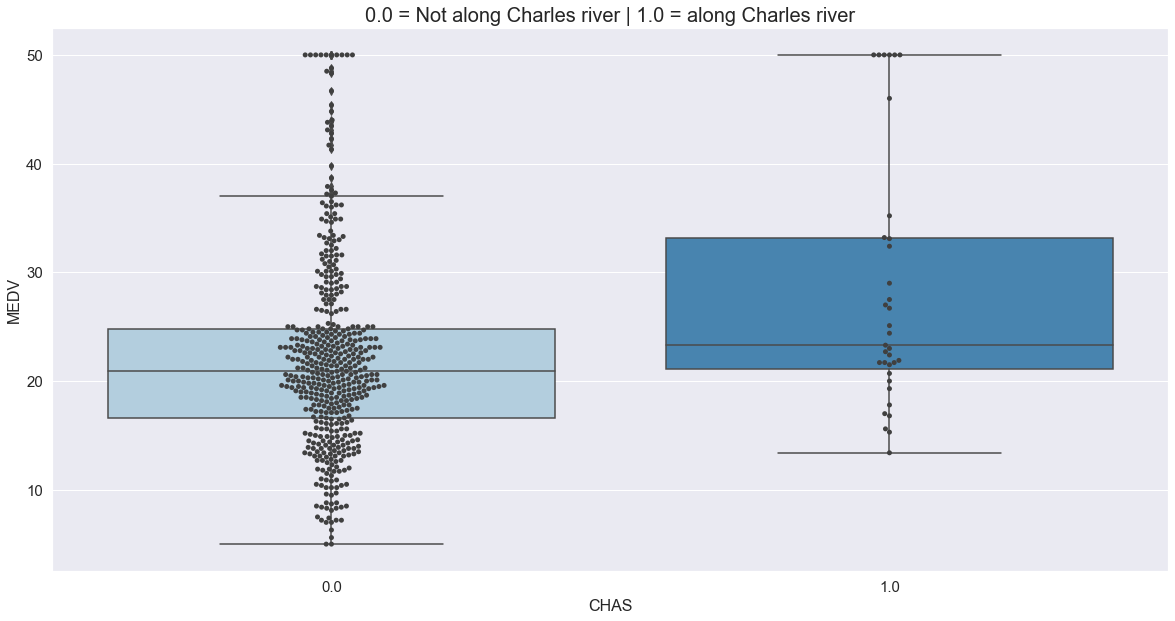

In [13]:
print('Plot 3')
ax = sns.boxplot(x="CHAS", y="MEDV", data=df, palette="Blues")
ax.axes.set_title("0.0 = Not along Charles river | 1.0 = along Charles river",fontsize=20)
ax.set_xlabel("CHAS",fontsize=16)
ax.set_ylabel("MEDV",fontsize=16)
ax.tick_params(labelsize=15)
ax = sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".25")
plt.show()

#### t-test
The t-test compares the means of the Median Values for houses along the Charles river and those not along the Charles river to evaluate whether their means are statistically different from each other. Below an independent t-test is performed as both groups can be considered independent from each other. 

A pvalue of >0.05 allows us to reject the null hypothesis. According to the t-test the likelihood of both same being from within the same poplulation is 0.0036. The t-test assumes normally distributed samples, as we can see from the histogram in **Plot 3** both the groups have positive skew, with tail's and outliers extending to the right.

In [14]:
print('The pvalue below of >0.05 indicates that the two groups are not from the same sample')
stats.ttest_ind(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0], equal_var=False)

The pvalue below of >0.05 indicates that the two groups are not from the same sample


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

This low pvalue gives good evidence that houses alongside the Charles river are more valuable because they are alongside the Charles river

#### ANOVA
Analysis of Variance (ANOVA) is another inferential statistical technique we can use to analyse whether there is a significant difference median house prices between houses that are along the Charles river and those that are not. 

ANOVA looks at the variation between the groups, and the variation within groups. It is normally used to compare means among more than two-groups. We use it here as a second point of reference since there is strong overlap between the two groups of housing types. 

Again the significant level is >0.05, in fact it is considerably less by being a negative value. We can again conslude that there is a significant between the median housing value of the two groups and infer that houses along the Charles river are move valuable.

In [15]:
stats.f_oneway(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

# Predict
![title](images\predict.jpg)
##### Ms Marvel (Carol Danvers) the Boston based Superhero with pre-cognative "seventh sense" powers. Perhaps she can make some predictions about housing in Boston too
##### Copyright https://www.marvel.com/characters/captain-marvel-carol-danvers/in-comics 

### Summary and conclusions
I would not use this 



![title](chart.jpg)


In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Import Libraries for preprocessing
import sklearn.preprocessing as pre

In [18]:
# Create a dataframe for pre-processing containing the independent variables 
x = df.iloc[:, 0:13]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
# Create a dataframe containing the dependent variable (median housing value) as the target for the neural network
target = df.iloc[:, 13:14]
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Fitting and Transforming

In [20]:
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [21]:
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)
xscale.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


#### Whiting

In [22]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [23]:
# Import the package for whitening the independent variables
import sklearn.decomposition as dec

In [24]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x)
xwhite = pd.DataFrame(pca.transform(x), columns=x.columns)
xwhite.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021


In [25]:
# Display the whitening of the independent variables to check there correlations are close to Zero (rounded) 
xwhite.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
CHAS,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
NOX,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
RM,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
AGE,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
DIS,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0
RAD,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0


In [26]:
# Import libraries for the neural network
from keras import Sequential
from keras.layers import Dense
from keras import metrics
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
import pydot

# Build our model and add layers to the neural network
m = kr.models.Sequential()
# Add the layers and adjust to optimise the network
m.add(kr.layers.Dense(5, input_dim=13, activation='tanh'))
m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(10, activation='sigmoid'))
#m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.categorical_accuracy])

In [27]:
# Create x and y values for the neural network
x = xwhite
y = target

In [28]:
# Train the neural network
m.fit(x, y,epochs=2000, batch_size=5)

Epoch 1/2000
506/506 [==============================] - 1s 2ms/step - loss: 593.1682 - mean_absolute_error: 22.5570 - categorical_accuracy: 1.0000
Epoch 2/2000
506/506 [==============================] - 0s 262us/step - loss: 558.6943 - mean_absolute_error: 21.7846 - categorical_accuracy: 1.0000
Epoch 3/2000
506/506 [==============================] - 0s 268us/step - loss: 518.2964 - mean_absolute_error: 20.8535 - categorical_accuracy: 1.0000
Epoch 4/2000
506/506 [==============================] - 0s 292us/step - loss: 469.8853 - mean_absolute_error: 19.6855 - categorical_accuracy: 1.0000
Epoch 5/2000
506/506 [==============================] - 0s 514us/step - loss: 421.9989 - mean_absolute_error: 18.4328 - categorical_accuracy: 1.0000
Epoch 6/2000
506/506 [==============================] - 0s 353us/step - loss: 381.8284 - mean_absolute_error: 17.2970 - categorical_accuracy: 1.0000
Epoch 7/2000
506/506 [==============================] - 0s 371us/step - loss: 348.3579 - mean_absolute_error

506/506 [==============================] - 0s 376us/step - loss: 35.3199 - mean_absolute_error: 3.7174 - categorical_accuracy: 1.0000
Epoch 57/2000
506/506 [==============================] - 0s 254us/step - loss: 34.4577 - mean_absolute_error: 3.6820 - categorical_accuracy: 1.0000
Epoch 58/2000
506/506 [==============================] - 0s 321us/step - loss: 33.6930 - mean_absolute_error: 3.6403 - categorical_accuracy: 1.0000
Epoch 59/2000
506/506 [==============================] - 0s 242us/step - loss: 32.9346 - mean_absolute_error: 3.5954 - categorical_accuracy: 1.0000
Epoch 60/2000
506/506 [==============================] - 0s 240us/step - loss: 32.2309 - mean_absolute_error: 3.5752 - categorical_accuracy: 1.0000
Epoch 61/2000
506/506 [==============================] - ETA: 0s - loss: 32.0055 - mean_absolute_error: 3.5538 - categorical_accuracy: 1.000 - 0s 317us/step - loss: 31.4409 - mean_absolute_error: 3.5236 - categorical_accuracy: 1.0000
Epoch 62/2000
506/506 [=================

506/506 [==============================] - 0s 258us/step - loss: 11.9125 - mean_absolute_error: 2.4532 - categorical_accuracy: 1.0000
Epoch 111/2000
506/506 [==============================] - 0s 294us/step - loss: 11.9186 - mean_absolute_error: 2.4208 - categorical_accuracy: 1.0000
Epoch 112/2000
506/506 [==============================] - 0s 244us/step - loss: 11.6033 - mean_absolute_error: 2.4193 - categorical_accuracy: 1.0000
Epoch 113/2000
506/506 [==============================] - 0s 256us/step - loss: 11.5601 - mean_absolute_error: 2.4164 - categorical_accuracy: 1.0000
Epoch 114/2000
506/506 [==============================] - 0s 238us/step - loss: 11.4055 - mean_absolute_error: 2.4180 - categorical_accuracy: 1.0000
Epoch 115/2000
506/506 [==============================] - 0s 262us/step - loss: 11.2983 - mean_absolute_error: 2.3833 - categorical_accuracy: 1.0000
Epoch 116/2000
506/506 [==============================] - 0s 264us/step - loss: 11.0940 - mean_absolute_error: 2.3992 - c

506/506 [==============================] - 0s 341us/step - loss: 8.3698 - mean_absolute_error: 2.1613 - categorical_accuracy: 1.0000
Epoch 165/2000
506/506 [==============================] - 0s 386us/step - loss: 8.3394 - mean_absolute_error: 2.1406 - categorical_accuracy: 1.0000
Epoch 166/2000
506/506 [==============================] - 0s 323us/step - loss: 8.3150 - mean_absolute_error: 2.1588 - categorical_accuracy: 1.0000
Epoch 167/2000
506/506 [==============================] - 0s 351us/step - loss: 8.2653 - mean_absolute_error: 2.1407 - categorical_accuracy: 1.0000
Epoch 168/2000
506/506 [==============================] - 0s 414us/step - loss: 8.2116 - mean_absolute_error: 2.1421 - categorical_accuracy: 1.00000s - loss: 8.5965 - mean_absolute_error: 2.2255 - categorical_accuracy: 1.
Epoch 169/2000
506/506 [==============================] - 0s 337us/step - loss: 8.3354 - mean_absolute_error: 2.1588 - categorical_accuracy: 1.0000
Epoch 170/2000
506/506 [=============================

506/506 [==============================] - 0s 284us/step - loss: 7.3955 - mean_absolute_error: 2.0377 - categorical_accuracy: 1.0000
Epoch 219/2000
506/506 [==============================] - 0s 290us/step - loss: 7.3708 - mean_absolute_error: 2.0578 - categorical_accuracy: 1.0000
Epoch 220/2000
506/506 [==============================] - 0s 284us/step - loss: 7.4026 - mean_absolute_error: 2.0445 - categorical_accuracy: 1.0000
Epoch 221/2000
506/506 [==============================] - 0s 284us/step - loss: 7.3430 - mean_absolute_error: 2.0259 - categorical_accuracy: 1.0000
Epoch 222/2000
506/506 [==============================] - 0s 248us/step - loss: 7.3393 - mean_absolute_error: 2.0528 - categorical_accuracy: 1.0000
Epoch 223/2000
506/506 [==============================] - 0s 229us/step - loss: 7.3636 - mean_absolute_error: 2.0270 - categorical_accuracy: 1.0000
Epoch 224/2000
506/506 [==============================] - 0s 256us/step - loss: 7.3042 - mean_absolute_error: 2.0524 - categori

506/506 [==============================] - 0s 457us/step - loss: 6.4822 - mean_absolute_error: 1.9259 - categorical_accuracy: 1.0000
Epoch 273/2000
506/506 [==============================] - 0s 374us/step - loss: 6.3972 - mean_absolute_error: 1.9043 - categorical_accuracy: 1.0000
Epoch 274/2000
506/506 [==============================] - 0s 319us/step - loss: 6.3998 - mean_absolute_error: 1.9181 - categorical_accuracy: 1.0000
Epoch 275/2000
506/506 [==============================] - 0s 307us/step - loss: 6.3928 - mean_absolute_error: 1.9015 - categorical_accuracy: 1.0000
Epoch 276/2000
506/506 [==============================] - 0s 304us/step - loss: 6.4270 - mean_absolute_error: 1.9113 - categorical_accuracy: 1.0000
Epoch 277/2000
506/506 [==============================] - 0s 233us/step - loss: 6.4377 - mean_absolute_error: 1.9005 - categorical_accuracy: 1.0000
Epoch 278/2000
506/506 [==============================] - 0s 215us/step - loss: 6.3508 - mean_absolute_error: 1.9064 - categori

506/506 [==============================] - 0s 258us/step - loss: 6.0271 - mean_absolute_error: 1.8594 - categorical_accuracy: 1.0000
Epoch 327/2000
506/506 [==============================] - 0s 260us/step - loss: 6.0359 - mean_absolute_error: 1.8501 - categorical_accuracy: 1.0000
Epoch 328/2000
506/506 [==============================] - 0s 231us/step - loss: 5.9220 - mean_absolute_error: 1.8297 - categorical_accuracy: 1.0000
Epoch 329/2000
506/506 [==============================] - 0s 213us/step - loss: 5.9778 - mean_absolute_error: 1.8568 - categorical_accuracy: 1.0000
Epoch 330/2000
506/506 [==============================] - 0s 227us/step - loss: 5.9552 - mean_absolute_error: 1.8523 - categorical_accuracy: 1.0000
Epoch 331/2000
506/506 [==============================] - 0s 238us/step - loss: 5.9565 - mean_absolute_error: 1.8372 - categorical_accuracy: 1.0000
Epoch 332/2000
506/506 [==============================] - 0s 274us/step - loss: 5.9853 - mean_absolute_error: 1.8412 - categori

506/506 [==============================] - 0s 246us/step - loss: 5.6997 - mean_absolute_error: 1.7964 - categorical_accuracy: 1.0000
Epoch 382/2000
506/506 [==============================] - 0s 231us/step - loss: 5.5724 - mean_absolute_error: 1.7858 - categorical_accuracy: 1.0000
Epoch 383/2000
506/506 [==============================] - 0s 231us/step - loss: 5.6731 - mean_absolute_error: 1.8003 - categorical_accuracy: 1.0000
Epoch 384/2000
506/506 [==============================] - 0s 225us/step - loss: 5.6254 - mean_absolute_error: 1.7907 - categorical_accuracy: 1.0000
Epoch 385/2000
506/506 [==============================] - 0s 272us/step - loss: 5.6166 - mean_absolute_error: 1.7963 - categorical_accuracy: 1.0000
Epoch 386/2000
506/506 [==============================] - 0s 252us/step - loss: 5.6146 - mean_absolute_error: 1.8046 - categorical_accuracy: 1.0000
Epoch 387/2000
506/506 [==============================] - 0s 258us/step - loss: 5.5656 - mean_absolute_error: 1.7874 - categori

506/506 [==============================] - 0s 323us/step - loss: 5.3857 - mean_absolute_error: 1.7757 - categorical_accuracy: 1.0000
Epoch 437/2000
506/506 [==============================] - 0s 319us/step - loss: 5.3221 - mean_absolute_error: 1.7530 - categorical_accuracy: 1.0000
Epoch 438/2000
506/506 [==============================] - 0s 268us/step - loss: 5.3469 - mean_absolute_error: 1.7505 - categorical_accuracy: 1.0000
Epoch 439/2000
506/506 [==============================] - 0s 266us/step - loss: 5.3359 - mean_absolute_error: 1.7646 - categorical_accuracy: 1.0000
Epoch 440/2000
506/506 [==============================] - ETA: 0s - loss: 5.0889 - mean_absolute_error: 1.7281 - categorical_accuracy: 1.00 - 0s 272us/step - loss: 5.2858 - mean_absolute_error: 1.7576 - categorical_accuracy: 1.0000
Epoch 441/2000
506/506 [==============================] - 0s 274us/step - loss: 5.3535 - mean_absolute_error: 1.7532 - categorical_accuracy: 1.0000
Epoch 442/2000
506/506 [===================

506/506 [==============================] - 0s 345us/step - loss: 5.1848 - mean_absolute_error: 1.7324 - categorical_accuracy: 1.0000
Epoch 491/2000
506/506 [==============================] - 0s 329us/step - loss: 5.1058 - mean_absolute_error: 1.7190 - categorical_accuracy: 1.0000
Epoch 492/2000
506/506 [==============================] - 0s 313us/step - loss: 5.1224 - mean_absolute_error: 1.7253 - categorical_accuracy: 1.0000
Epoch 493/2000
506/506 [==============================] - 0s 426us/step - loss: 5.1368 - mean_absolute_error: 1.7360 - categorical_accuracy: 1.0000
Epoch 494/2000
506/506 [==============================] - 0s 288us/step - loss: 5.0708 - mean_absolute_error: 1.7094 - categorical_accuracy: 1.0000
Epoch 495/2000
506/506 [==============================] - 0s 298us/step - loss: 5.2025 - mean_absolute_error: 1.7512 - categorical_accuracy: 1.0000
Epoch 496/2000
506/506 [==============================] - 0s 274us/step - loss: 5.0830 - mean_absolute_error: 1.7215 - categori

506/506 [==============================] - 0s 317us/step - loss: 4.9652 - mean_absolute_error: 1.7015 - categorical_accuracy: 1.0000
Epoch 546/2000
506/506 [==============================] - 0s 304us/step - loss: 4.9881 - mean_absolute_error: 1.7089 - categorical_accuracy: 1.0000
Epoch 547/2000
506/506 [==============================] - 0s 298us/step - loss: 5.0260 - mean_absolute_error: 1.7175 - categorical_accuracy: 1.0000
Epoch 548/2000
506/506 [==============================] - 0s 306us/step - loss: 5.0019 - mean_absolute_error: 1.7076 - categorical_accuracy: 1.0000
Epoch 549/2000
506/506 [==============================] - 0s 315us/step - loss: 4.9795 - mean_absolute_error: 1.7008 - categorical_accuracy: 1.0000
Epoch 550/2000
506/506 [==============================] - 0s 286us/step - loss: 4.9566 - mean_absolute_error: 1.6979 - categorical_accuracy: 1.0000
Epoch 551/2000
506/506 [==============================] - 0s 284us/step - loss: 4.9587 - mean_absolute_error: 1.7094 - categori

506/506 [==============================] - 0s 323us/step - loss: 4.8720 - mean_absolute_error: 1.6900 - categorical_accuracy: 1.0000
Epoch 601/2000
506/506 [==============================] - 0s 325us/step - loss: 4.8382 - mean_absolute_error: 1.6930 - categorical_accuracy: 1.0000
Epoch 602/2000
506/506 [==============================] - 0s 325us/step - loss: 4.8940 - mean_absolute_error: 1.6963 - categorical_accuracy: 1.0000
Epoch 603/2000
506/506 [==============================] - 0s 363us/step - loss: 4.8498 - mean_absolute_error: 1.6806 - categorical_accuracy: 1.0000
Epoch 604/2000
506/506 [==============================] - 0s 376us/step - loss: 4.8155 - mean_absolute_error: 1.6741 - categorical_accuracy: 1.0000
Epoch 605/2000
506/506 [==============================] - 0s 319us/step - loss: 4.8681 - mean_absolute_error: 1.6952 - categorical_accuracy: 1.0000
Epoch 606/2000
506/506 [==============================] - 0s 319us/step - loss: 4.8110 - mean_absolute_error: 1.6759 - categori

506/506 [==============================] - 0s 315us/step - loss: 4.7150 - mean_absolute_error: 1.6647 - categorical_accuracy: 1.0000
Epoch 656/2000
506/506 [==============================] - 0s 473us/step - loss: 4.7620 - mean_absolute_error: 1.6930 - categorical_accuracy: 1.0000
Epoch 657/2000
506/506 [==============================] - 0s 497us/step - loss: 4.7410 - mean_absolute_error: 1.6730 - categorical_accuracy: 1.0000
Epoch 658/2000
506/506 [==============================] - 0s 501us/step - loss: 4.7262 - mean_absolute_error: 1.6704 - categorical_accuracy: 1.0000
Epoch 659/2000
506/506 [==============================] - 0s 509us/step - loss: 4.7041 - mean_absolute_error: 1.6688 - categorical_accuracy: 1.0000
Epoch 660/2000
506/506 [==============================] - 1s 1ms/step - loss: 4.6984 - mean_absolute_error: 1.6620 - categorical_accuracy: 1.0000
Epoch 661/2000
506/506 [==============================] - 0s 623us/step - loss: 4.7475 - mean_absolute_error: 1.6776 - categorica

506/506 [==============================] - 0s 311us/step - loss: 4.6670 - mean_absolute_error: 1.6546 - categorical_accuracy: 1.0000
Epoch 711/2000
506/506 [==============================] - 0s 290us/step - loss: 4.6233 - mean_absolute_error: 1.6519 - categorical_accuracy: 1.0000
Epoch 712/2000
506/506 [==============================] - 0s 278us/step - loss: 4.6315 - mean_absolute_error: 1.6693 - categorical_accuracy: 1.0000
Epoch 713/2000
506/506 [==============================] - 0s 315us/step - loss: 4.6786 - mean_absolute_error: 1.6619 - categorical_accuracy: 1.0000
Epoch 714/2000
506/506 [==============================] - 0s 317us/step - loss: 4.5965 - mean_absolute_error: 1.6465 - categorical_accuracy: 1.0000
Epoch 715/2000
506/506 [==============================] - ETA: 0s - loss: 4.5992 - mean_absolute_error: 1.6259 - categorical_accuracy: 1.00 - 0s 327us/step - loss: 4.6439 - mean_absolute_error: 1.6446 - categorical_accuracy: 1.0000
Epoch 716/2000
506/506 [===================

506/506 [==============================] - 0s 282us/step - loss: 4.4748 - mean_absolute_error: 1.6268 - categorical_accuracy: 1.0000
Epoch 765/2000
506/506 [==============================] - 0s 302us/step - loss: 4.5131 - mean_absolute_error: 1.6273 - categorical_accuracy: 1.0000
Epoch 766/2000
506/506 [==============================] - 0s 327us/step - loss: 4.5356 - mean_absolute_error: 1.6343 - categorical_accuracy: 1.0000
Epoch 767/2000
506/506 [==============================] - 0s 304us/step - loss: 4.5184 - mean_absolute_error: 1.6293 - categorical_accuracy: 1.0000
Epoch 768/2000
506/506 [==============================] - 0s 317us/step - loss: 4.5479 - mean_absolute_error: 1.6394 - categorical_accuracy: 1.0000
Epoch 769/2000
506/506 [==============================] - 0s 317us/step - loss: 4.5320 - mean_absolute_error: 1.6215 - categorical_accuracy: 1.0000
Epoch 770/2000
506/506 [==============================] - 0s 317us/step - loss: 4.4775 - mean_absolute_error: 1.6243 - categori

506/506 [==============================] - 0s 317us/step - loss: 4.5035 - mean_absolute_error: 1.6274 - categorical_accuracy: 1.0000
Epoch 820/2000
506/506 [==============================] - 0s 309us/step - loss: 4.4661 - mean_absolute_error: 1.6212 - categorical_accuracy: 1.0000
Epoch 821/2000
506/506 [==============================] - 0s 321us/step - loss: 4.4707 - mean_absolute_error: 1.6244 - categorical_accuracy: 1.0000
Epoch 822/2000
506/506 [==============================] - 0s 307us/step - loss: 4.4843 - mean_absolute_error: 1.6237 - categorical_accuracy: 1.0000
Epoch 823/2000
506/506 [==============================] - 0s 319us/step - loss: 4.4435 - mean_absolute_error: 1.6124 - categorical_accuracy: 1.0000
Epoch 824/2000
506/506 [==============================] - 0s 319us/step - loss: 4.4651 - mean_absolute_error: 1.6189 - categorical_accuracy: 1.0000
Epoch 825/2000
506/506 [==============================] - 0s 309us/step - loss: 4.5429 - mean_absolute_error: 1.6537 - categori

506/506 [==============================] - 0s 272us/step - loss: 4.3414 - mean_absolute_error: 1.6036 - categorical_accuracy: 1.0000
Epoch 875/2000
506/506 [==============================] - 0s 325us/step - loss: 4.3551 - mean_absolute_error: 1.6066 - categorical_accuracy: 1.0000
Epoch 876/2000
506/506 [==============================] - 0s 280us/step - loss: 4.3392 - mean_absolute_error: 1.6034 - categorical_accuracy: 1.0000
Epoch 877/2000
506/506 [==============================] - 0s 256us/step - loss: 4.3590 - mean_absolute_error: 1.6000 - categorical_accuracy: 1.0000
Epoch 878/2000
506/506 [==============================] - 0s 268us/step - loss: 4.3210 - mean_absolute_error: 1.6026 - categorical_accuracy: 1.0000
Epoch 879/2000
506/506 [==============================] - 0s 266us/step - loss: 4.3242 - mean_absolute_error: 1.5992 - categorical_accuracy: 1.0000
Epoch 880/2000
506/506 [==============================] - 0s 264us/step - loss: 4.3617 - mean_absolute_error: 1.6071 - categori

506/506 [==============================] - 0s 333us/step - loss: 4.2555 - mean_absolute_error: 1.5905 - categorical_accuracy: 1.0000
Epoch 930/2000
506/506 [==============================] - 0s 335us/step - loss: 4.2331 - mean_absolute_error: 1.5834 - categorical_accuracy: 1.0000
Epoch 931/2000
506/506 [==============================] - 0s 313us/step - loss: 4.2822 - mean_absolute_error: 1.5851 - categorical_accuracy: 1.0000
Epoch 932/2000
506/506 [==============================] - 0s 323us/step - loss: 4.2610 - mean_absolute_error: 1.5870 - categorical_accuracy: 1.0000
Epoch 933/2000
506/506 [==============================] - 0s 315us/step - loss: 4.2555 - mean_absolute_error: 1.5909 - categorical_accuracy: 1.0000
Epoch 934/2000
506/506 [==============================] - 0s 304us/step - loss: 4.2748 - mean_absolute_error: 1.5913 - categorical_accuracy: 1.0000
Epoch 935/2000
506/506 [==============================] - 0s 315us/step - loss: 4.2866 - mean_absolute_error: 1.6017 - categori

506/506 [==============================] - 0s 286us/step - loss: 4.2081 - mean_absolute_error: 1.5763 - categorical_accuracy: 1.0000
Epoch 985/2000
506/506 [==============================] - 0s 262us/step - loss: 4.1831 - mean_absolute_error: 1.5735 - categorical_accuracy: 1.0000
Epoch 986/2000
506/506 [==============================] - 0s 260us/step - loss: 4.2343 - mean_absolute_error: 1.5778 - categorical_accuracy: 1.0000
Epoch 987/2000
506/506 [==============================] - 0s 274us/step - loss: 4.2296 - mean_absolute_error: 1.5845 - categorical_accuracy: 1.0000
Epoch 988/2000
506/506 [==============================] - 0s 264us/step - loss: 4.3039 - mean_absolute_error: 1.5930 - categorical_accuracy: 1.0000
Epoch 989/2000
506/506 [==============================] - 0s 262us/step - loss: 4.2052 - mean_absolute_error: 1.5755 - categorical_accuracy: 1.0000
Epoch 990/2000
506/506 [==============================] - 0s 260us/step - loss: 4.1676 - mean_absolute_error: 1.5651 - categori

506/506 [==============================] - 0s 311us/step - loss: 4.1387 - mean_absolute_error: 1.5711 - categorical_accuracy: 1.0000
Epoch 1040/2000
506/506 [==============================] - 0s 309us/step - loss: 4.1393 - mean_absolute_error: 1.5625 - categorical_accuracy: 1.0000
Epoch 1041/2000
506/506 [==============================] - 0s 300us/step - loss: 4.2017 - mean_absolute_error: 1.5682 - categorical_accuracy: 1.0000
Epoch 1042/2000
506/506 [==============================] - 0s 333us/step - loss: 4.1313 - mean_absolute_error: 1.5610 - categorical_accuracy: 1.0000
Epoch 1043/2000
506/506 [==============================] - 0s 637us/step - loss: 4.1170 - mean_absolute_error: 1.5505 - categorical_accuracy: 1.0000
Epoch 1044/2000
506/506 [==============================] - 0s 647us/step - loss: 4.1979 - mean_absolute_error: 1.5702 - categorical_accuracy: 1.0000
Epoch 1045/2000
506/506 [==============================] - 0s 499us/step - loss: 4.1575 - mean_absolute_error: 1.5553 - ca

506/506 [==============================] - 0s 288us/step - loss: 4.0912 - mean_absolute_error: 1.5507 - categorical_accuracy: 1.0000
Epoch 1094/2000
506/506 [==============================] - 0s 254us/step - loss: 4.1690 - mean_absolute_error: 1.5611 - categorical_accuracy: 1.0000
Epoch 1095/2000
506/506 [==============================] - 0s 264us/step - loss: 4.0933 - mean_absolute_error: 1.5460 - categorical_accuracy: 1.0000
Epoch 1096/2000
506/506 [==============================] - 0s 280us/step - loss: 4.1210 - mean_absolute_error: 1.5497 - categorical_accuracy: 1.0000
Epoch 1097/2000
506/506 [==============================] - 0s 292us/step - loss: 4.1006 - mean_absolute_error: 1.5542 - categorical_accuracy: 1.0000
Epoch 1098/2000
506/506 [==============================] - 0s 292us/step - loss: 4.1415 - mean_absolute_error: 1.5555 - categorical_accuracy: 1.0000
Epoch 1099/2000
506/506 [==============================] - 0s 278us/step - loss: 4.1394 - mean_absolute_error: 1.5611 - ca

506/506 [==============================] - 0s 276us/step - loss: 4.1159 - mean_absolute_error: 1.5540 - categorical_accuracy: 1.0000
Epoch 1149/2000
506/506 [==============================] - 0s 258us/step - loss: 4.1144 - mean_absolute_error: 1.5578 - categorical_accuracy: 1.0000
Epoch 1150/2000
506/506 [==============================] - 0s 262us/step - loss: 4.2494 - mean_absolute_error: 1.5763 - categorical_accuracy: 1.0000
Epoch 1151/2000
506/506 [==============================] - 0s 262us/step - loss: 4.1121 - mean_absolute_error: 1.5543 - categorical_accuracy: 1.0000
Epoch 1152/2000
506/506 [==============================] - 0s 256us/step - loss: 4.0838 - mean_absolute_error: 1.5556 - categorical_accuracy: 1.0000
Epoch 1153/2000
506/506 [==============================] - 0s 262us/step - loss: 4.0622 - mean_absolute_error: 1.5454 - categorical_accuracy: 1.0000
Epoch 1154/2000
506/506 [==============================] - 0s 262us/step - loss: 4.0658 - mean_absolute_error: 1.5467 - ca

506/506 [==============================] - 0s 349us/step - loss: 4.0529 - mean_absolute_error: 1.5383 - categorical_accuracy: 1.0000
Epoch 1203/2000
506/506 [==============================] - 0s 361us/step - loss: 4.0616 - mean_absolute_error: 1.5397 - categorical_accuracy: 1.0000
Epoch 1204/2000
506/506 [==============================] - 0s 353us/step - loss: 4.0282 - mean_absolute_error: 1.5421 - categorical_accuracy: 1.0000
Epoch 1205/2000
506/506 [==============================] - 0s 349us/step - loss: 4.1276 - mean_absolute_error: 1.5644 - categorical_accuracy: 1.0000
Epoch 1206/2000
506/506 [==============================] - 0s 365us/step - loss: 4.1638 - mean_absolute_error: 1.5721 - categorical_accuracy: 1.0000
Epoch 1207/2000
506/506 [==============================] - 0s 339us/step - loss: 4.0792 - mean_absolute_error: 1.5529 - categorical_accuracy: 1.0000
Epoch 1208/2000
506/506 [==============================] - 0s 325us/step - loss: 4.0917 - mean_absolute_error: 1.5485 - ca

506/506 [==============================] - 0s 268us/step - loss: 4.0751 - mean_absolute_error: 1.5406 - categorical_accuracy: 1.0000
Epoch 1257/2000
506/506 [==============================] - 0s 276us/step - loss: 4.0635 - mean_absolute_error: 1.5520 - categorical_accuracy: 1.0000
Epoch 1258/2000
506/506 [==============================] - 0s 260us/step - loss: 4.0809 - mean_absolute_error: 1.5579 - categorical_accuracy: 1.0000
Epoch 1259/2000
506/506 [==============================] - 0s 262us/step - loss: 4.0323 - mean_absolute_error: 1.5415 - categorical_accuracy: 1.0000
Epoch 1260/2000
506/506 [==============================] - 0s 270us/step - loss: 4.1008 - mean_absolute_error: 1.5571 - categorical_accuracy: 1.0000
Epoch 1261/2000
506/506 [==============================] - 0s 256us/step - loss: 4.0666 - mean_absolute_error: 1.5516 - categorical_accuracy: 1.0000
Epoch 1262/2000
506/506 [==============================] - 0s 270us/step - loss: 4.0305 - mean_absolute_error: 1.5357 - ca

506/506 [==============================] - 0s 272us/step - loss: 3.9950 - mean_absolute_error: 1.5330 - categorical_accuracy: 1.0000
Epoch 1311/2000
506/506 [==============================] - 0s 264us/step - loss: 4.0163 - mean_absolute_error: 1.5342 - categorical_accuracy: 1.0000
Epoch 1312/2000
506/506 [==============================] - 0s 280us/step - loss: 4.0469 - mean_absolute_error: 1.5404 - categorical_accuracy: 1.0000
Epoch 1313/2000
506/506 [==============================] - 0s 294us/step - loss: 3.9653 - mean_absolute_error: 1.5141 - categorical_accuracy: 1.0000
Epoch 1314/2000
506/506 [==============================] - 0s 284us/step - loss: 4.0351 - mean_absolute_error: 1.5402 - categorical_accuracy: 1.0000
Epoch 1315/2000
506/506 [==============================] - 0s 270us/step - loss: 4.0047 - mean_absolute_error: 1.5328 - categorical_accuracy: 1.0000
Epoch 1316/2000
506/506 [==============================] - 0s 266us/step - loss: 4.0053 - mean_absolute_error: 1.5329 - ca

506/506 [==============================] - 0s 302us/step - loss: 3.9900 - mean_absolute_error: 1.5216 - categorical_accuracy: 1.0000
Epoch 1365/2000
506/506 [==============================] - 0s 307us/step - loss: 3.9710 - mean_absolute_error: 1.5293 - categorical_accuracy: 1.0000
Epoch 1366/2000
506/506 [==============================] - 0s 302us/step - loss: 3.9565 - mean_absolute_error: 1.5260 - categorical_accuracy: 1.0000
Epoch 1367/2000
506/506 [==============================] - 0s 309us/step - loss: 3.9711 - mean_absolute_error: 1.5310 - categorical_accuracy: 1.0000
Epoch 1368/2000
506/506 [==============================] - 0s 304us/step - loss: 3.9359 - mean_absolute_error: 1.5145 - categorical_accuracy: 1.0000
Epoch 1369/2000
506/506 [==============================] - 0s 264us/step - loss: 3.9561 - mean_absolute_error: 1.5294 - categorical_accuracy: 1.0000
Epoch 1370/2000
506/506 [==============================] - 0s 284us/step - loss: 3.9664 - mean_absolute_error: 1.5304 - ca

506/506 [==============================] - 0s 492us/step - loss: 3.9628 - mean_absolute_error: 1.5282 - categorical_accuracy: 1.0000
Epoch 1419/2000
506/506 [==============================] - 0s 596us/step - loss: 3.9585 - mean_absolute_error: 1.5274 - categorical_accuracy: 1.0000
Epoch 1420/2000
506/506 [==============================] - 0s 550us/step - loss: 3.9094 - mean_absolute_error: 1.5072 - categorical_accuracy: 1.0000
Epoch 1421/2000
506/506 [==============================] - 0s 853us/step - loss: 3.9250 - mean_absolute_error: 1.5094 - categorical_accuracy: 1.0000
Epoch 1422/2000
506/506 [==============================] - 1s 1ms/step - loss: 3.9256 - mean_absolute_error: 1.5117 - categorical_accuracy: 1.0000: 0s - loss: 4.1948 - mean_absolute_error: 1.5942 - categorical_ac
Epoch 1423/2000
506/506 [==============================] - 0s 635us/step - loss: 3.9277 - mean_absolute_error: 1.5211 - categorical_accuracy: 1.0000
Epoch 1424/2000
506/506 [==============================] -

506/506 [==============================] - 0s 304us/step - loss: 3.8673 - mean_absolute_error: 1.5061 - categorical_accuracy: 1.0000
Epoch 1472/2000
506/506 [==============================] - 0s 315us/step - loss: 3.8882 - mean_absolute_error: 1.5076 - categorical_accuracy: 1.0000
Epoch 1473/2000
506/506 [==============================] - 0s 313us/step - loss: 3.9842 - mean_absolute_error: 1.5262 - categorical_accuracy: 1.0000
Epoch 1474/2000
506/506 [==============================] - 0s 327us/step - loss: 3.9281 - mean_absolute_error: 1.5154 - categorical_accuracy: 1.0000
Epoch 1475/2000
506/506 [==============================] - 0s 325us/step - loss: 3.9359 - mean_absolute_error: 1.5132 - categorical_accuracy: 1.0000
Epoch 1476/2000
506/506 [==============================] - 0s 333us/step - loss: 3.9206 - mean_absolute_error: 1.5193 - categorical_accuracy: 1.0000
Epoch 1477/2000
506/506 [==============================] - 0s 329us/step - loss: 3.8785 - mean_absolute_error: 1.4976 - ca

506/506 [==============================] - 0s 286us/step - loss: 3.9125 - mean_absolute_error: 1.5151 - categorical_accuracy: 1.0000
Epoch 1526/2000
506/506 [==============================] - 0s 302us/step - loss: 3.9001 - mean_absolute_error: 1.5135 - categorical_accuracy: 1.0000
Epoch 1527/2000
506/506 [==============================] - 0s 302us/step - loss: 3.8797 - mean_absolute_error: 1.5035 - categorical_accuracy: 1.0000
Epoch 1528/2000
506/506 [==============================] - 0s 298us/step - loss: 3.9525 - mean_absolute_error: 1.5279 - categorical_accuracy: 1.0000
Epoch 1529/2000
506/506 [==============================] - 0s 309us/step - loss: 3.8526 - mean_absolute_error: 1.4998 - categorical_accuracy: 1.0000
Epoch 1530/2000
506/506 [==============================] - 0s 307us/step - loss: 3.9487 - mean_absolute_error: 1.5208 - categorical_accuracy: 1.0000
Epoch 1531/2000
506/506 [==============================] - 0s 302us/step - loss: 3.8738 - mean_absolute_error: 1.4994 - ca

506/506 [==============================] - 0s 333us/step - loss: 3.8987 - mean_absolute_error: 1.5054 - categorical_accuracy: 1.0000
Epoch 1580/2000
506/506 [==============================] - 0s 357us/step - loss: 4.0948 - mean_absolute_error: 1.5482 - categorical_accuracy: 1.0000
Epoch 1581/2000
506/506 [==============================] - 0s 369us/step - loss: 3.8779 - mean_absolute_error: 1.4915 - categorical_accuracy: 1.0000
Epoch 1582/2000
506/506 [==============================] - 0s 373us/step - loss: 3.8806 - mean_absolute_error: 1.5085 - categorical_accuracy: 1.0000
Epoch 1583/2000
506/506 [==============================] - 0s 351us/step - loss: 3.8451 - mean_absolute_error: 1.5026 - categorical_accuracy: 1.0000
Epoch 1584/2000
506/506 [==============================] - 0s 313us/step - loss: 3.8601 - mean_absolute_error: 1.5000 - categorical_accuracy: 1.0000
Epoch 1585/2000
506/506 [==============================] - 0s 311us/step - loss: 3.8251 - mean_absolute_error: 1.4878 - ca

506/506 [==============================] - 0s 307us/step - loss: 3.8411 - mean_absolute_error: 1.4880 - categorical_accuracy: 1.0000
Epoch 1635/2000
506/506 [==============================] - 0s 307us/step - loss: 3.8512 - mean_absolute_error: 1.5029 - categorical_accuracy: 1.0000
Epoch 1636/2000
506/506 [==============================] - 0s 306us/step - loss: 3.8483 - mean_absolute_error: 1.5028 - categorical_accuracy: 1.0000
Epoch 1637/2000
506/506 [==============================] - 0s 300us/step - loss: 3.8237 - mean_absolute_error: 1.4856 - categorical_accuracy: 1.0000
Epoch 1638/2000
506/506 [==============================] - 0s 298us/step - loss: 3.8963 - mean_absolute_error: 1.5081 - categorical_accuracy: 1.0000
Epoch 1639/2000
506/506 [==============================] - 0s 300us/step - loss: 3.8487 - mean_absolute_error: 1.4900 - categorical_accuracy: 1.0000
Epoch 1640/2000
506/506 [==============================] - 0s 302us/step - loss: 3.8370 - mean_absolute_error: 1.4947 - ca

506/506 [==============================] - 0s 288us/step - loss: 3.9138 - mean_absolute_error: 1.5133 - categorical_accuracy: 1.0000
Epoch 1690/2000
506/506 [==============================] - 0s 266us/step - loss: 3.8474 - mean_absolute_error: 1.4966 - categorical_accuracy: 1.0000
Epoch 1691/2000
506/506 [==============================] - 0s 260us/step - loss: 3.8343 - mean_absolute_error: 1.4942 - categorical_accuracy: 1.0000
Epoch 1692/2000
506/506 [==============================] - 0s 262us/step - loss: 3.8883 - mean_absolute_error: 1.5022 - categorical_accuracy: 1.0000
Epoch 1693/2000
506/506 [==============================] - 0s 270us/step - loss: 3.8364 - mean_absolute_error: 1.4947 - categorical_accuracy: 1.0000
Epoch 1694/2000
506/506 [==============================] - 0s 264us/step - loss: 3.8791 - mean_absolute_error: 1.5114 - categorical_accuracy: 1.0000
Epoch 1695/2000
506/506 [==============================] - 0s 282us/step - loss: 3.8267 - mean_absolute_error: 1.4981 - ca

506/506 [==============================] - 0s 327us/step - loss: 3.8608 - mean_absolute_error: 1.4973 - categorical_accuracy: 1.0000
Epoch 1745/2000
506/506 [==============================] - 0s 327us/step - loss: 3.8620 - mean_absolute_error: 1.5112 - categorical_accuracy: 1.0000
Epoch 1746/2000
506/506 [==============================] - 0s 331us/step - loss: 3.8233 - mean_absolute_error: 1.4875 - categorical_accuracy: 1.0000
Epoch 1747/2000
506/506 [==============================] - 0s 331us/step - loss: 3.8196 - mean_absolute_error: 1.4923 - categorical_accuracy: 1.0000
Epoch 1748/2000
506/506 [==============================] - 0s 325us/step - loss: 3.8235 - mean_absolute_error: 1.4886 - categorical_accuracy: 1.0000
Epoch 1749/2000
506/506 [==============================] - 0s 329us/step - loss: 3.8712 - mean_absolute_error: 1.5061 - categorical_accuracy: 1.0000
Epoch 1750/2000
506/506 [==============================] - 0s 337us/step - loss: 3.7873 - mean_absolute_error: 1.4776 - ca

506/506 [==============================] - 0s 373us/step - loss: 3.9115 - mean_absolute_error: 1.5074 - categorical_accuracy: 1.0000
Epoch 1799/2000
506/506 [==============================] - 0s 268us/step - loss: 3.8089 - mean_absolute_error: 1.4852 - categorical_accuracy: 1.0000
Epoch 1800/2000
506/506 [==============================] - 0s 306us/step - loss: 3.7999 - mean_absolute_error: 1.4865 - categorical_accuracy: 1.0000
Epoch 1801/2000
506/506 [==============================] - 0s 266us/step - loss: 3.8499 - mean_absolute_error: 1.4917 - categorical_accuracy: 1.0000
Epoch 1802/2000
506/506 [==============================] - 0s 268us/step - loss: 3.8350 - mean_absolute_error: 1.5014 - categorical_accuracy: 1.0000
Epoch 1803/2000
506/506 [==============================] - 0s 266us/step - loss: 3.8056 - mean_absolute_error: 1.4805 - categorical_accuracy: 1.0000
Epoch 1804/2000
506/506 [==============================] - 0s 264us/step - loss: 3.8092 - mean_absolute_error: 1.4858 - ca

506/506 [==============================] - 0s 327us/step - loss: 3.8072 - mean_absolute_error: 1.4927 - categorical_accuracy: 1.0000
Epoch 1853/2000
506/506 [==============================] - 0s 380us/step - loss: 3.8122 - mean_absolute_error: 1.4813 - categorical_accuracy: 1.0000
Epoch 1854/2000
506/506 [==============================] - 0s 339us/step - loss: 3.8279 - mean_absolute_error: 1.4872 - categorical_accuracy: 1.0000
Epoch 1855/2000
506/506 [==============================] - 0s 345us/step - loss: 3.8395 - mean_absolute_error: 1.5017 - categorical_accuracy: 1.00000s - loss: 3.5819 - mean_absolute_error: 1.4725 - categorical_accuracy: 1.
Epoch 1856/2000
506/506 [==============================] - 0s 339us/step - loss: 3.7839 - mean_absolute_error: 1.4819 - categorical_accuracy: 1.0000
Epoch 1857/2000
506/506 [==============================] - 0s 359us/step - loss: 3.8225 - mean_absolute_error: 1.4937 - categorical_accuracy: 1.0000
Epoch 1858/2000
506/506 [=======================

506/506 [==============================] - 0s 268us/step - loss: 3.7995 - mean_absolute_error: 1.4853 - categorical_accuracy: 1.0000
Epoch 1907/2000
506/506 [==============================] - 0s 262us/step - loss: 3.7653 - mean_absolute_error: 1.4734 - categorical_accuracy: 1.0000
Epoch 1908/2000
506/506 [==============================] - 0s 278us/step - loss: 3.8432 - mean_absolute_error: 1.4942 - categorical_accuracy: 1.0000
Epoch 1909/2000
506/506 [==============================] - 0s 264us/step - loss: 3.8191 - mean_absolute_error: 1.4868 - categorical_accuracy: 1.0000
Epoch 1910/2000
506/506 [==============================] - 0s 264us/step - loss: 3.8767 - mean_absolute_error: 1.4928 - categorical_accuracy: 1.0000
Epoch 1911/2000
506/506 [==============================] - 0s 260us/step - loss: 3.7846 - mean_absolute_error: 1.4745 - categorical_accuracy: 1.0000
Epoch 1912/2000
506/506 [==============================] - 0s 272us/step - loss: 3.7624 - mean_absolute_error: 1.4750 - ca

506/506 [==============================] - 0s 274us/step - loss: 3.8182 - mean_absolute_error: 1.4863 - categorical_accuracy: 1.0000
Epoch 1962/2000
506/506 [==============================] - 0s 274us/step - loss: 3.7931 - mean_absolute_error: 1.4869 - categorical_accuracy: 1.0000
Epoch 1963/2000
506/506 [==============================] - 0s 280us/step - loss: 3.8089 - mean_absolute_error: 1.4824 - categorical_accuracy: 1.0000
Epoch 1964/2000
506/506 [==============================] - 0s 331us/step - loss: 3.7819 - mean_absolute_error: 1.4765 - categorical_accuracy: 1.0000
Epoch 1965/2000
506/506 [==============================] - 0s 266us/step - loss: 3.8262 - mean_absolute_error: 1.4901 - categorical_accuracy: 1.0000
Epoch 1966/2000
506/506 [==============================] - 0s 264us/step - loss: 3.8718 - mean_absolute_error: 1.4964 - categorical_accuracy: 1.0000
Epoch 1967/2000
506/506 [==============================] - 0s 260us/step - loss: 3.8114 - mean_absolute_error: 1.4795 - ca

In [29]:
# make preduction and put in the object 'p',it is returned as a numpy array
p = m.predict(x)

In [30]:
# put the prediction array into a panda's dataframe and give it the column heading P_MEDV (Predicted Median Value)
prediction_output = pd.DataFrame(p, columns=['P_MEDV'])

In [31]:
# Concatenate the prediction dataframe to the original dataframe and return as a new dataframe called output
output = pd.concat([df.iloc[:, 0:14], prediction_output], axis=1)

In [32]:
# display the first five rows output datafrome
output.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,P_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,21.342922
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.274496
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.698414
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.822803
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,32.999779


Plot 4


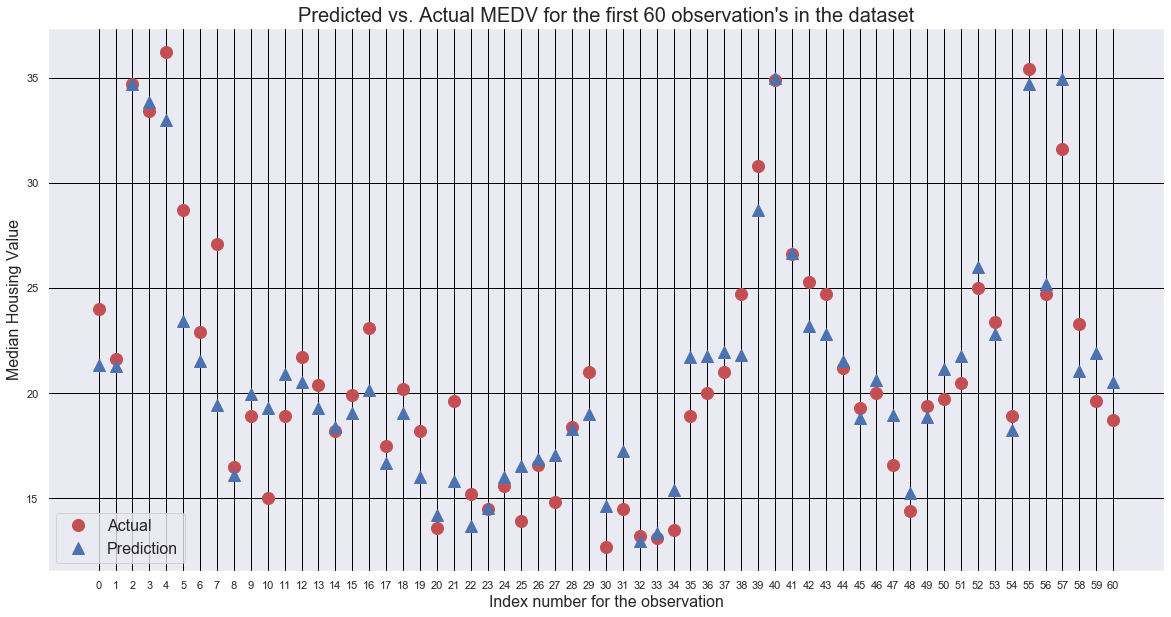

In [33]:
print('Plot 4')
# Adjust the loc slicer to return other observations, just remember to keep B_MEDV and P_MEDV the same
B_MEDV = output.loc[:60, 'MEDV'] 
P_MEDV = output.loc[:60, 'P_MEDV'] 

fig, ax = plt.subplots()
ax.plot(B_MEDV, color='r', marker='o', markersize=12, linestyle='', label="Actual")
ax.plot(P_MEDV, color='b', marker='^', markersize=12, linestyle='', label="Prediction")
ax.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel("Index number for the observation", fontsize=16)
plt.ylabel("Median Housing Value", fontsize=16)
plt.title("Predicted vs. Actual MEDV for the first 60 observation's in the dataset", fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.xticks(np.arange(0, 61, step=1))
plt.savefig("images\chart.jpg")
plt.show()


In [34]:
# Create a new column in the dataframe that is the difference between the Actual and Preducted values
output['DIFF'] = output['MEDV'] - output['P_MEDV']

In [35]:
# Display the predictive statistics for the difference between actual and predicted values
output['DIFF'].describe().round(2)

count    506.00
mean       0.01
std        1.92
min       -6.73
25%       -1.07
50%        0.09
75%        1.20
max        7.65
Name: DIFF, dtype: float64

In [36]:
plot_model(m, to_file='model.png')


OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

### References
https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

https://blog.datarobot.com/ordinary-least-squares-in-python

https://pythonfordatascience.org/anova-python/#data

https://en.wikipedia.org/wiki/Ordinary_least_squares

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

(1997) The problem of multicollinearity. In: Understanding Regression Analysis. Springer, Boston, MA

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://keras.rstudio.com/articles/tutorial_basic_regression.html

https://github.com/topics/boston-housing-price-prediction?o=desc&s=updated